In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def load_gene_expression_data(file_path):
    """
    Load gene expression data from a CSV file.
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file containing gene expression data
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame containing the gene expression data
    """
    # Load the data
    print(f"Loading gene expression data from {file_path}...")
    df = pd.read_csv(file_path)
    
    # Display basic information
    print(f"Data shape: {df.shape}")
    print(f"Number of cells: {df.shape[0]}")
    print(f"Number of genes: {df.shape[1] - 1}")  # Subtract 1 for the cell ID column
    
    # Check for missing values
    missing_values = df.isnull().sum().sum()
    print(f"Missing values: {missing_values}")
    
    return df

def summarize_expression(df):
    """
    Provide a summary of the gene expression data.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing gene expression data
    """
    # Get expression statistics
    cell_ids = df['cell'].values
    
    # Remove the cell ID column for numerical analysis
    expression_data = df.drop('cell', axis=1)
    
    # Calculate statistics
    total_genes = expression_data.shape[1]
    expressed_per_cell = (expression_data > 0).sum(axis=1)
    expressed_per_gene = (expression_data > 0).sum(axis=0)
    
    print("\nExpression Summary:")
    print(f"Average number of expressed genes per cell: {expressed_per_cell.mean():.2f}")
    print(f"Percentage of genes expressed across all cells: {(expressed_per_gene > 0).sum() / total_genes * 100:.2f}%")
    
    # Find top expressed genes
    top_genes = expressed_per_gene.sort_values(ascending=False).head(10)
    print("\nTop 10 most commonly expressed genes:")
    for gene, count in top_genes.items():
        print(f"{gene}: expressed in {count} cells ({count/len(cell_ids)*100:.2f}%)")
    
    return expressed_per_cell, expressed_per_gene

def plot_expression_distribution(df):
    """
    Create plots to visualize the gene expression distribution.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing gene expression data
    """
    # Set up the plotting style
    # plt.style.use('seaborn-whitegrid') # This line causes an error
    sns.set_style("whitegrid") # Use seaborn's set_style instead
    
    # Remove the cell ID column for numerical analysis
    expression_data = df.drop('cell', axis=1)
    
    # Plot 1: Distribution of expression values
    plt.figure(figsize=(10, 6))
    
    # Get non-zero values for plotting
    non_zero_values = expression_data.values.flatten()
    non_zero_values = non_zero_values[non_zero_values > 0]
    
    if len(non_zero_values) > 0:
        sns.histplot(non_zero_values, bins=30, kde=True)
        plt.title('Distribution of Non-Zero Expression Values')
        plt.xlabel('Expression Value')
        plt.ylabel('Frequency')
        plt.savefig('expression_distribution.png')
        print("Saved expression distribution plot to 'expression_distribution.png'")
    else:
        print("No non-zero expression values found for plotting")
    
    # Plot 2: Number of expressed genes per cell
    expressed_per_cell = (expression_data > 0).sum(axis=1)
    
    plt.figure(figsize=(10, 6))
    sns.histplot(expressed_per_cell, bins=30, kde=True)
    plt.title('Number of Expressed Genes per Cell')
    plt.xlabel('Number of Genes')
    plt.ylabel('Number of Cells')
    plt.savefig('genes_per_cell.png')
    print("Saved genes per cell plot to 'genes_per_cell.png'")

Loading gene expression data from region_R1/cell_by_gene.csv...
Data shape: (37838, 1001)
Number of cells: 37838
Number of genes: 1000
Missing values: 0

First few rows of the data:
                  cell  Gnai3  Ngfr  Wnt3  Ccnd2  Lhx2  Itgb2  Cdh1  Cdh4  \
0  1678497400002100019      0     0     0      0     0      0     0     0   
1  1678497400002100023      0     0     0      0     0      0     0     0   
2  1678497400002100081      0     0     0      0     0      0     0     0   
3  1678497400002100103      0     0     0      0     0      0     0     0   
4  1678497400002100105      0     0     0      0     0      0     0     0   

   Plin2  ...  Blank-31  Blank-32  Blank-33  Blank-34  Blank-35  Blank-36  \
0      0  ...         0         0         0         0         0         0   
1      0  ...         0         0         0         0         0         0   
2      0  ...         0         0         0         0         0         0   
3      0  ...         0         0         0    

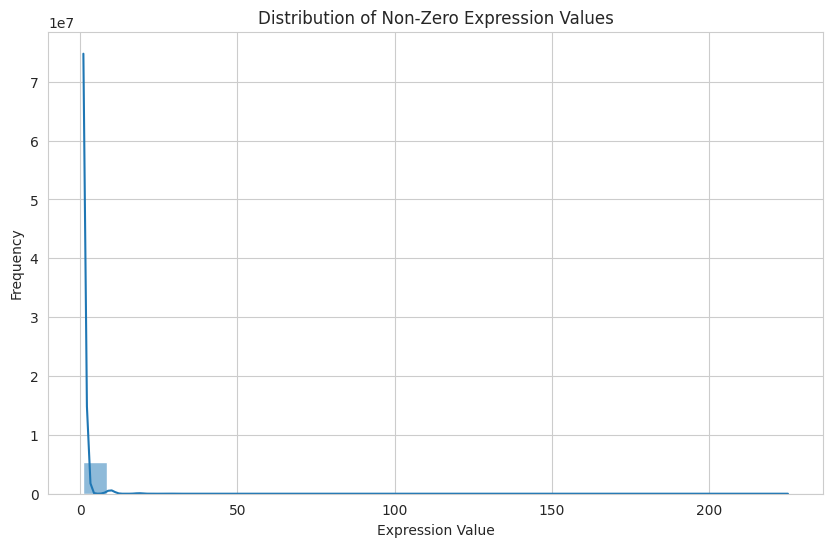

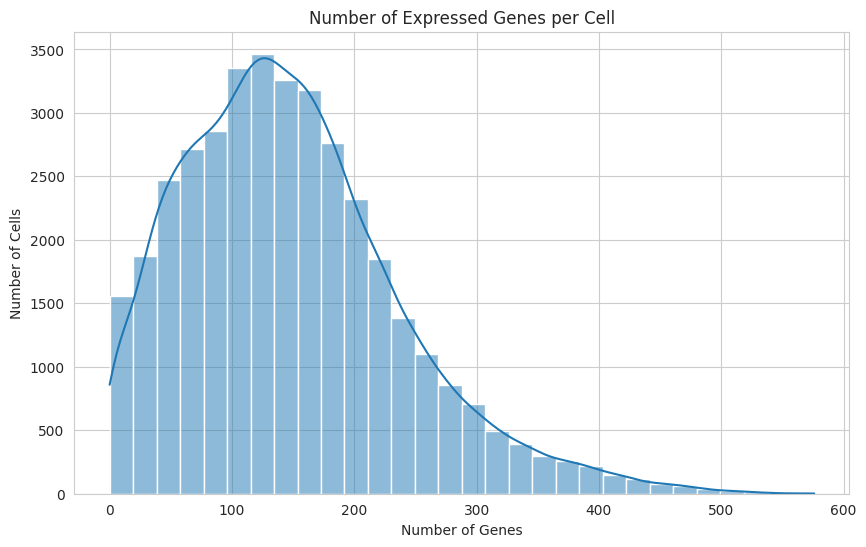

In [7]:
if __name__ == "__main__":
    # Path to the gene expression data file
    file_path = "region_R1/cell_by_gene.csv"
    
    # Load the data
    gene_df = load_gene_expression_data(file_path)
    
    # Display the first few rows
    print("\nFirst few rows of the data:")
    print(gene_df.head())
    
    # Summarize expression
    expressed_per_cell, expressed_per_gene = summarize_expression(gene_df)
    
    # Plot expression distribution
    plot_expression_distribution(gene_df)
    
    print("\nData loading and analysis complete!") 